<a href="https://colab.research.google.com/github/lenakaravaeva/steganography/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline

## Подгрузим картинки из интернета:

In [ ]:
import os
os.system('curl -O https://avatarko.ru/img/kartinka/33/multfilm_lyagushka_32117.jpg')
data=plt.imread('multfilm_lyagushka_32117.jpg') # загружаем скачанный выше файл из файловой системы ОС в данный ноутбук
print('Data shape:',data.shape)  # размерноесть массива, который получен из картинки
print('Data type:',type(data))  # типы данных, в которых записано изображение

Data shape: (683, 1024, 3)
Data type: <class 'numpy.ndarray'>


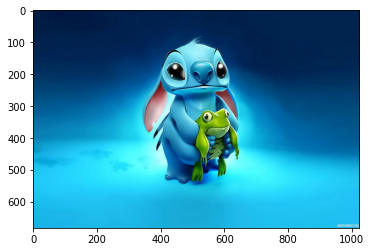

In [ ]:
plt.imshow(data)
plt.show()

In [ ]:
os.system('curl -O https://img.myloview.ru/posters/top-secret-letter-700-108625888.jpg')
data_secret_raw=plt.imread('top-secret-letter-700-108625888.jpg')
print('Data shape:',data_secret_raw.shape)
print('Data type:',type(data_secret_raw))

Data shape: (622, 700, 3)
Data type: <class 'numpy.ndarray'>


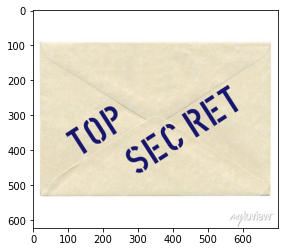

In [ ]:
plt.imshow(data_secret_raw)
plt.show()

## Обрезаем картинки до нужного нам размера

In [ ]:
def crop_center(img: np.ndarray, crop_height: int, crop_width: int):
    """Данный метод обрезает изображение до размеров (crop_height, crop_width)"""
    from skimage.util import crop

    img_height, img_width, _ = img.shape
    assert img_height >= crop_height  # иначе метод crop неверно работает
    assert img_width >= crop_width  # иначе метод crop неверно работает
    d_height = img_height - crop_height  # сколько надо отрезать по высоте от картинки
    d_width = img_width - crop_width  # сколько надо отрезать по ширине от картинки
    data_crop = crop(img, ((d_height // 2, d_height - d_height // 2), (d_width // 2, d_width - d_width // 2), (0, 0)), copy=False)  # в скобках внутри метода указывается сколько надо отрезать ((сверху, справа), (слева, снизу), ...)
    return data_crop


Data shape: (600, 700, 3)
Data type: <class 'numpy.ndarray'>


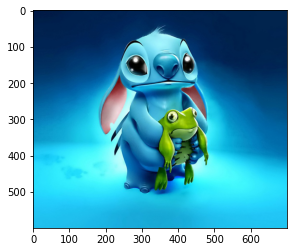

In [ ]:
data=crop_center(data, 600, 700)
print('Data shape:',data.shape)
print('Data type:',type(data))
plt.imshow(data)
plt.show()

Data shape: (600, 700, 3)
Data type: <class 'numpy.ndarray'>


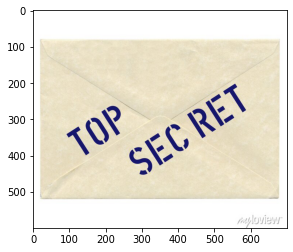

In [ ]:
data_secret_raw=crop_center(data_secret_raw, 600, 700)
print('Data shape:',data_secret_raw.shape)
print('Data type:',type(data_secret_raw))
plt.imshow(data_secret_raw)
plt.show()

## Исследуем данные в массивах, которые получены из изображений

In [ ]:
# смотрим в пиксель по адресу [100, 10] в слой цвета под номером 2 (скорее всего голубой)
data[100, 10, 2]

84

In [ ]:
np.max(data[:,:,:])

255

In [ ]:
np.min(data[:,:,:])

0

Минимальное значение яркости среди всех пикселей = 0 

Максимальное значение яркости среди всех пикселей = 255.

Следовательно яркость одного пикселя в одном канале лежит в диапазоне [0, 255]

# Определим ряд вспомогательных функций, которые мы будем в дальнейшем использовать

Опеределим функцию, которая для конкретного пикселя для конкрентного канала из целого числа из диапазона [0,255] выдает целое число из диапазона [0,1]

In [ ]:
def make_pixel_binary_from_8bit(pix):
  """Данная функция возвращает 1, если pix >= 128. Иначе возвращает 0."""
  if (pix >= 2**7):
    return 1
  else:
    return 0


С помощью np.vectorize определяем специфичную питоновскую функцию, которая к каждому элементу массива нашей картинки применяет функцию make_pixel_binary_from_8bit

In [ ]:
vec_func_make_pixel_binary_from_8bit = np.vectorize(make_pixel_binary_from_8bit) 


Применяем функцию, чтобы получить бинарное изображения

Обращаю внимание, что при этом теряется информация в изображении, т.е. мы получили совершенно новое изображение

In [ ]:
data_secret_binary = vec_func_make_pixel_binary_from_8bit(data_secret_raw) 


In [ ]:
print('Минимальное значение в массиве:', np.min(data_secret_binary[:,:,:]))
print('Максимальное значение в массиве:', np.max(data_secret_binary[:,:,:]))
print('Data shape:', data_secret_binary.shape)
print('Data type:',type(data_secret_binary))

Минимальное значение в массиве: 0
Максимальное значение в массиве: 1
Data shape: (600, 700, 3)
Data type: <class 'numpy.ndarray'>


Мы не сможем полученное выше бинарное изображение отрисовать, поэтому определим функцию, которая для конкретного пикселя для конкрентного канала из целого числа из диапазона [0,1] выдает целое число из диапазона [0,255]

Это надо, чтобы увидеть какую картинку будем передавать в НЗБ далее

In [ ]:
def make_pixel_8bit_from_binary(pix):
  """Данная функция возвращает 255, если pix == 1. Иначе возвращает 0."""
  if (pix == 1):
    return 255
  else:
    return 0


С помощью np.vectorize определяем особую функцию, которая к каждому элементу массива нашей картинки применяет функцию make_pixel_8bit_from_binary

In [ ]:
vec_func_make_pixel_8bit_from_binary = np.vectorize(make_pixel_8bit_from_binary) 


In [ ]:
data_secret = vec_func_make_pixel_8bit_from_binary(data_secret_binary) 
np.max(data_secret[:,:,:])

255

Data shape: (600, 700, 3)
Data type: <class 'numpy.ndarray'>


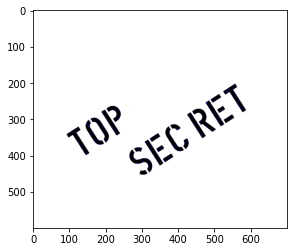

In [ ]:
data_secret_raw=crop_center(data_secret, 600, 700)
print('Data shape:',data_secret.shape)
print('Data type:',type(data_secret))
plt.imshow(data_secret)
plt.show()


Картика выше - это как раз то изображение, которое мы будем передавать внутри другой картинки в НЗБ

Разбираемся с определенными объектами:

`data` - картинка со Стичем, в который в НЗБ будем встраивать инфу

`data_secret_raw` - "сырая", полноцветная ([0,255] возможных значений цветов) картинка, которая содержит сведения, которые будут сокрыты внутри другой картинки

`data_secret_binary` - монохромная (в каждом канале) картинка полученная из `data_secret_raw` оставлением только двух возможных значений цвета - [0,1]

`data_secret` - монохромная (в каждом канале) картинка, полученная из `data_secret_binary` для отобржения средствами python (содержит два возможных значений цвета - 0 и 255)

Далее просто пытаюсь разобраться как работают битовые оперции в питоне

In [ ]:
print(data[2,2,1])
print(type(data[2,2,1]))

27
<class 'numpy.uint8'>


In [ ]:
tmp1=data[2,2,1]
np.logical_or(tmp1, tmp1)

True

In [ ]:
a = -0b1111 # a = -15
b = ~a # b = 14
c = bin(b) # c = 0b1110
print(a)
print(type(a))
print(b)
print(type(b))
print(c)
print(type(c))

-15
<class 'int'>
14
<class 'int'>
0b1110
<class 'str'>


In [ ]:
a = data[2,2,1] # a = 27
b = ~a # b = 14
c = bin(b) # c = 0b1110
print(a)
print(type(a))
print(b)
print(type(b))
print(c)
print(type(c))

27
<class 'numpy.uint8'>
228
<class 'numpy.uint8'>
0b11100100
<class 'str'>


In [ ]:
print(1)
print(bin(1))

print(1 << 2)
print(bin(1 << 2))

1
0b1
4
0b100


In [ ]:
print(1<<3)
print(bin(1<<3))

print(~(1<<3))
print(bin(~(1<<3)))

8
0b1000
-9
-0b1001


In [ ]:
tmp2=(1<<3)
print(tmp2)
print(bin(tmp2))

print(255-tmp2)
print(bin(255-tmp2))

8
0b1000
247
0b11110111


In [ ]:
print(tmp1)
print(bin(tmp1))
# строим битмаску
print(255-(1<<3))
print(bin(255-(1<<3)))
# обнуляем третий бит
print(tmp1 & (255-(1<<3)))
print(bin(tmp1 & (255-(1<<3))))

27
0b11011
247
0b11110111
19
0b10011


Разобралась с битовыми операциями, идем дальше

### Укладываем картинку `data_secret_binary` в картинку `data` первой модификацией НЗБ-встраивания - непосредственной заменой битовой плоскости

Реализуем непосредственную замену битовой плоскости изображения встроенной информацией

Нижеприведенная формула описывает это кодирование:

$ C_{p}^{W}(n_{1},n_{2}) = W(n_{1},n_{2}) $

Где $p$  - индекс битовой плоскости,

$W$ - значение интенсивности встраемого пикселя,

$C_{p}^{W}$ - итоговое значение интенсивности пикселя (но только не всё число, а в битовой плоскости $p$), со встроенными данными,

$(n_{1},n_{2})$ - два индекса пикселя на картинке

In [ ]:
def encode_pix_with_replacing_1_method(pix: int, pix_secret: int, bitmap_number: int):
  """
  Данный метод реализовывает НЗБ-встраивание первым методом - заменой битовой плоскости.
  Keyword arguments:
    pix -- Пиксель изображения, в который встраивем код в НЗБ. Подразумевается, что переменная pix целочисленная и лежит в диапазоне [0, 255].
    pix_secret -- Пиксель изображения, который будем встраивать. Он должен быть целочисленным и лежать в диапазоне [0, 1].
    bitmap_number -- Номер битовой плоскости, в которую встраивается информация из pix_secret (отсчёт плоскостей начинается справа). Целое число в диапазоне [0, 7]
  """
  assert str(pix).isdigit(), "в pix может хранится только целое число"
  assert str(pix_secret).isdigit(), "в pix может хранится только целое число"
  assert str(bitmap_number).isdigit(), "в pix может хранится только целое число"
  
  pix = int(pix)
  pix_secret = int(pix_secret)
  bitmap_number = int(bitmap_number)

  assert (pix_secret == 0) | (pix_secret == 1), "в pix_secret может хранится только целое число 0 или 1"
  assert (pix >=0) & (pix <= 255), "в pix может хранится только целое число в диапазоне [0, 255]"
  assert (bitmap_number >=0) & (bitmap_number <= 7), "в bitmap_number может хранится только целое число в диапазоне [0, 7]"
  
  #print("pix =", pix, "=", bin(pix), "- Это исходное восьмибитное число")
  
  # строим битмаску
  bitmask1 = 1 << bitmap_number # ставим единицу в разряд bitmap_number в битовом представлении числа с помощью операции побитового сдвига
  #print("bitmask1 =", bitmask1, "=", bin(bitmask1), "- Это число, у которого в разряде bitmap_number =", bitmap_number, "стоит единица, а в остальных разрядах ноль")
  
  bitmask_inverse = 255 - (bitmask1) # инвертируем bitmask1
  #print("bitmask_inverse =", bitmask_inverse, "=", bin(bitmask_inverse), "- Это число, у которого в разряде bitmap_number =", bitmap_number, "стоит ноль, а в остальных разрядах единица")
  
  # обнуляем бит под номером bitmap_number с помощью битмаски
  pix_with_zeros_nzb = pix & bitmask_inverse
  #print("pix_with_zeros_nzb =", pix_with_zeros_nzb, "=", bin(pix_with_zeros_nzb), "- Это число pix, у которого в разряде bitmap_number =", bitmap_number, "установили ноль")

  # Вот в формуле снизу разница всех модификаций, которая нужна в задании

  bitmask_with_pix_secret = pix_secret << bitmap_number # ставим pix_secret в разряд bitmap_number в битовом представлении числа с помощью операции побитового сдвига
  #print("bitmask_with_pix_secret =", bitmask_with_pix_secret, "=", bin(bitmask_with_pix_secret), "- Это число, у которого в разряде bitmap_number =", bitmap_number, "стоит значение pix_secret =", pix_secret, ", а в остальных разрядах ноль")
  pix_with_encoded_secret = pix_with_zeros_nzb | bitmask_with_pix_secret
  #print("pix_with_encoded_secret =", pix_with_encoded_secret, "=", bin(pix_with_encoded_secret), "- Это число pix =", pix, ", у которого в разряде bitmap_number =", bitmap_number, "стоит значение pix_secret =", pix_secret, ", а в остальных разрядах ноль")
  return pix_with_encoded_secret

encode_pix_with_replacing_1_method(27, 1, 7)

155

С помощью np.vectorize определяем особую функцию, которая к каждому элементу массива нашей картинки применяет функцию encode_pix_with_replacing

In [ ]:
vec_func_encode_pix_with_replacing_1_method = np.vectorize(encode_pix_with_replacing_1_method)

Data shape: (600, 700, 3)
Data type: <class 'numpy.ndarray'>


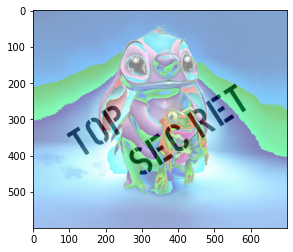

In [ ]:
bitmap_number_1_method = 7

data_with_with_encoded_secret_1_method = vec_func_encode_pix_with_replacing_1_method(data, data_secret_binary, bitmap_number_1_method) 
print('Data shape:',data_with_with_encoded_secret_1_method.shape)
print('Data type:',type(data_with_with_encoded_secret_1_method))
plt.imshow(data_with_with_encoded_secret_1_method)
plt.show()

### Из исходной картинки `data` и закодированной картинки `data_with_with_encoded_secret_1_method` (полученной первой модификацией НЗБ-встраивания - заменой битовой плоскости изображения битами скрываемой информации) получим обратно сокрытую информацию - картинку `data_secret_binary`

In [ ]:
def decode_pix_with_replacing_1_method(encoded_pix: int, pix: int, bitmap_number: int):
  
  #print("encoded_pix =", encoded_pix, "=", bin(encoded_pix), "- Это закодированное восьмибитное число со встроенной информацией")
  #print("pix =", pix, "=", bin(pix), "- Это исходное восьмибитное число")
  
  # строим битмаску
  bitmask1 = 1 << bitmap_number # ставим единицу в разряд bitmap_number в битовом представлении числа с помощью операции побитового сдвига
  #print("bitmask1 =", bitmask1, "=", bin(bitmask1), "- Это число, у которого в разряде bitmap_number =", bitmap_number, "стоит единица, а в остальных разрядах ноль")

  encoded_pix_on_bitmap_number = (encoded_pix & bitmask1) >> bitmap_number
  #print("encoded_pix_on_bitmap_number =", encoded_pix_on_bitmap_number, "=", bin(encoded_pix_on_bitmap_number), "- Это значение бита, в разряде bitmap_number =", bitmap_number, " у числа encoded_pix =", encoded_pix)
  
  return encoded_pix_on_bitmap_number

decode_pix_with_replacing_1_method(27, 26, 0)

1

С помощью np.vectorize определяем особую функцию, которая к каждому элементу массива нашей картинки применяет функцию decode_pix_with_replacing_1_method

In [ ]:
vec_func_decode_pix_with_replacing_1_method = np.vectorize(decode_pix_with_replacing_1_method)

max = 1
max = 255
Data shape: (600, 700, 3)
Data type: <class 'numpy.ndarray'>


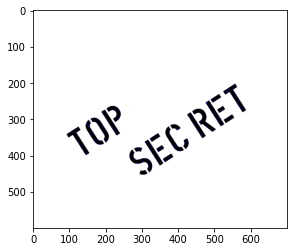

In [ ]:
decoded_secret_data_1_method = vec_func_decode_pix_with_replacing_1_method(data_with_with_encoded_secret_1_method, data, bitmap_number_1_method)
print("max =", np.max(decoded_secret_data_1_method))
# мы получили бинарное изображение и np.max(decoded_secret_data_2_method)=1, преобразуем ранеенаписанной функцией в восьмибитную
decoded_secret_data_1_method = vec_func_make_pixel_8bit_from_binary(decoded_secret_data_1_method)
print("max =", np.max(decoded_secret_data_1_method))

print('Data shape:', decoded_secret_data_1_method.shape)
print('Data type:', type(decoded_secret_data_1_method))
plt.imshow(decoded_secret_data_1_method)
plt.show()

Мы без потерь декодировали скрытую информацию из картинки первым методом

### Укладываем картинку `data_secret_binary` в картинку `data` второй модификацией НЗБ-встраивания - побитовым сложением битовой плоскости изображения с битами скрываемой информации

Реализуем непосредственную замену битовой плоскоости изображения встроеной информацией

Нижеприведенная формула описывает это кодирование:

$ C_{p}^{W}(n_{1},n_{2}) = C_{p}(n_{1},n_{2})  \&  W(n_{1},n_{2}) $

Где $p$  - индекс битовой плоскости,

$W$ - значение интенсивности встраемого пикселя,

$C_{p}^{W}$ - итоговое значение интенсивности пикселя (но только не всё число, а в битовой плоскости $p$), со встроенными данными,

$C_{p}(n_{1},n_{2})$ - исходное значение интенсивности пикселя (но только не всё число, а в битовой плоскости $p$) до встраивания данных,

$(n_{1},n_{2})$ - два индекса пикселя на картинке

In [ ]:
def encode_pix_with_logical_and_2_method(pix: int, pix_secret: int, bitmap_number: int):
  """
  Данный метод реализовывает НЗБ-встраивание вторым методом - побитовым сложением битовой плоскости изображения с битами скрываемой информации.
  Keyword arguments:
    pix -- Пиксель изображения, в который встраивем код в НЗБ. Подразумевается, что переменная pix целочисленная и лежит в диапазоне [0, 255].
    pix_secret -- Пиксель изображения, который будем встраивать. Он должен быть целочисленным и лежать в диапазоне [0, 1].
    bitmap_number -- Номер битовой плоскости, в которую встраивается информация из pix_secret (отсчёт плоскостей начинается справа). Целое число в диапазоне [0, 7]
  """
  assert str(pix).isdigit(), "в pix может хранится только целое число"
  assert str(pix_secret).isdigit(), "в pix может хранится только целое число"
  assert str(bitmap_number).isdigit(), "в pix может хранится только целое число"
  
  pix = int(pix)
  pix_secret = int(pix_secret)
  bitmap_number = int(bitmap_number)

  assert (pix_secret == 0) | (pix_secret == 1), "в pix_secret может хранится только целое число 0 или 1"
  assert (pix >=0) & (pix <= 255), "в pix может хранится только целое число в диапазоне [0, 255]"
  assert (bitmap_number >=0) & (bitmap_number <= 7), "в bitmap_number может хранится только целое число в диапазоне [0, 7]"
  
  #print("pix =", pix, "=", bin(pix), "- Это исходное восьмибитное число")
  
  # строим битмаску
  bitmask1 = 1 << bitmap_number # ставим единицу в разряд bitmap_number в битовом представлении числа с помощью операции побитового сдвига
  #print("bitmask1 =", bitmask1, "=", bin(bitmask1), "- Это число, у которого в разряде bitmap_number =", bitmap_number, "стоит единица, а в остальных разрядах ноль")
  
  bitmask_inverse = 255 - (bitmask1) # инвертируем bitmask1
  #print("bitmask_inverse =", bitmask_inverse, "=", bin(bitmask_inverse), "- Это число, у которого в разряде bitmap_number =", bitmap_number, "стоит ноль, а в остальных разрядах единица")
  
  # обнуляем бит под номером bitmap_number с помощью битмаски
  pix_with_zeros_nzb = pix & bitmask_inverse
  #print("pix_with_zeros_nzb =", pix_with_zeros_nzb, "=", bin(pix_with_zeros_nzb), "- Это число pix, у которого в разряде bitmap_number =", bitmap_number, "установили ноль")

  # Достаем значение бита числа pix в битовой плоскости bitmap_number
  pix_on_bitmap_number = (pix & bitmask1) >> bitmap_number
  #print("pix_on_bitmap_number =", pix_on_bitmap_number, "=", bin(pix_on_bitmap_number), "- Это значение бита, в разряде bitmap_number =", bitmap_number, " у числа pix =", pix)
  
  # Вот в формуле снизу разница всех модификаций, которая нужна в задании
  bitmask_with_pix_secret = (pix_secret & pix_on_bitmap_number) << bitmap_number # ставим pix_secret & pix в разряд bitmap_number в битовом представлении числа с помощью операции побитового сдвига
  #print("bitmask_with_pix_secret =", bitmask_with_pix_secret, "=", bin(bitmask_with_pix_secret), "- Это число, у которого в разряде bitmap_number =", bitmap_number, "стоит значение pix_secret =", pix_secret, ", а в остальных разрядах ноль")
  pix_with_encoded_secret = pix_with_zeros_nzb | bitmask_with_pix_secret
  #print("pix_with_encoded_secret =", pix_with_encoded_secret, "=", bin(pix_with_encoded_secret), "- Это число pix =", pix, ", у которого в разряде bitmap_number =", bitmap_number, "стоит значение pix_secret =", pix_secret, ", а в остальных разрядах ноль")
  return pix_with_encoded_secret

encode_pix_with_logical_and_2_method(27, 1, 1)

27

С помощью np.vectorize определяем особую функцию, которая к каждому элементу массива нашей картинки применяет функцию encode_pix_with_replacing

In [ ]:
vec_func_encode_pix_with_logical_and_2_method = np.vectorize(encode_pix_with_logical_and_2_method)

Data shape: (600, 700, 3)
Data type: <class 'numpy.ndarray'>


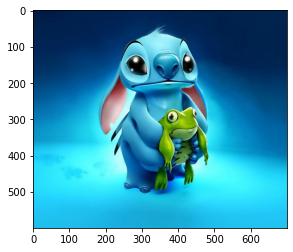

In [ ]:
bitmap_number_2_method = 1

data_with_with_encoded_secret_2_method = vec_func_encode_pix_with_logical_and_2_method(data, data_secret_binary, bitmap_number_2_method) 
print('Data shape:', data_with_with_encoded_secret_2_method.shape)
print('Data type:', type(data_with_with_encoded_secret_2_method))
plt.imshow(data_with_with_encoded_secret_2_method)
plt.show()

### Из исходной картинки `data` и закодированной картинки `data_with_with_encoded_secret_2_method` (полученной второй модификацией НЗБ-встраивания - побитовым сложением битовой плоскости изображения с битами скрываемой информации) получим обратно сокрытую информацию - картинку `data_secret_binary`

In [ ]:
def decode_pix_with_logical_and_2_method(encoded_pix: int, pix: int, bitmap_number: int):
  
  #print("encoded_pix =", encoded_pix, "=", bin(encoded_pix), "- Это закодированное восьмибитное число со встроенной информацией")
  #print("pix =", pix, "=", bin(pix), "- Это исходное восьмибитное число")
  
  # строим битмаску
  bitmask1 = 1 << bitmap_number # ставим единицу в разряд bitmap_number в битовом представлении числа с помощью операции побитового сдвига
  #print("bitmask1 =", bitmask1, "=", bin(bitmask1), "- Это число, у которого в разряде bitmap_number =", bitmap_number, "стоит единица, а в остальных разрядах ноль")

  # Достаем значение бита числа pix в битовой плоскости bitmap_number
  pix_on_bitmap_number = (pix & bitmask1) >> bitmap_number
  #print("pix_on_bitmap_number =", pix_on_bitmap_number, "=", bin(pix_on_bitmap_number), "- Это значение бита, в разряде bitmap_number =", bitmap_number, " у числа pix =", pix)
  
  encoded_pix_on_bitmap_number = (encoded_pix & bitmask1) >> bitmap_number
  #print("encoded_pix_on_bitmap_number =", encoded_pix_on_bitmap_number, "=", bin(encoded_pix_on_bitmap_number), "- Это значение бита, в разряде bitmap_number =", bitmap_number, " у числа encoded_pix =", encoded_pix)

  # Вот в формуле снизу разница всех модификаций, которая нужна в задании

  return encoded_pix_on_bitmap_number & pix_on_bitmap_number

decode_pix_with_logical_and_2_method(27, 26, 0)

0

С помощью np.vectorize определяем особую функцию, которая к каждому элементу массива нашей картинки применяет функцию decode_pix_with_logical_and_2_method

In [ ]:
vec_func_decode_pix_with_logical_and_2_method = np.vectorize(decode_pix_with_logical_and_2_method)

max = 255
Data shape: (600, 700, 3)
Data type: <class 'numpy.ndarray'>


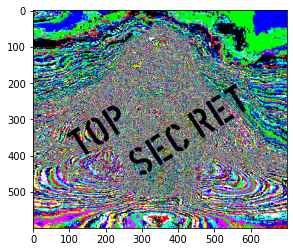

In [ ]:
decoded_secret_data_2_method = vec_func_decode_pix_with_logical_and_2_method(data_with_with_encoded_secret_2_method, data, bitmap_number_2_method) 
# мы получили бинарное изображение и np.max(decoded_secret_data_2_method)=1, преобразуем ранеенаписанной функцией в восьмибитную
decoded_secret_data_2_method = vec_func_make_pixel_8bit_from_binary(decoded_secret_data_2_method)
print("max =", np.max(decoded_secret_data_2_method))
print('Data shape:', decoded_secret_data_2_method.shape)
print('Data type:', type(decoded_secret_data_2_method))
plt.imshow(decoded_secret_data_2_method)
plt.show()

Мы с потерями, но декодировали скрытую информацию из картинки вторым методом

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


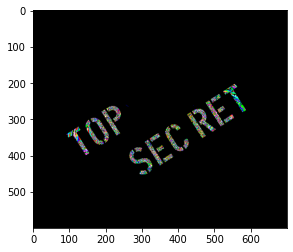

In [ ]:
# Интереса ради вычитаем две картинки c костыльной нормализацией, чтобы узнать отличия между ними
plt.imshow(abs(data_with_with_encoded_secret_2_method - data) * 8 / bitmap_number_2_method)
plt.show()
# Как понятно, стойкость такого кодирования скрытой информации невелика

# Реализуем по заданию для моего 7 варианта 1 и 2 задание.

## Встраивание в первый и второй наименее значимый бит (НЗБ) информации методом побитового сложения битовой плоскости контейнера с битами скрываемой информации

Повторим вышеприведенную формулу такого кодирования:


$ C_{p}^{W}(n_{1},n_{2}) = C_{p}(n_{1},n_{2})  \&  W(n_{1},n_{2}) $

Где $p$  - индекс битовой плоскости,

$W$ - значение интенсивности встраемого пикселя,

$C_{p}^{W}$ - итоговое значение интенсивности пикселя (но только не всё число, а в битовой плоскости $p$), со встроенными данными,

$C_{p}(n_{1},n_{2})$ - исходное значение интенсивности пикселя (но только не всё число, а в битовой плоскости $p$) до встраивания данных,

$(n_{1},n_{2})$ - два индекса пикселя на картинке

Исходная восьмибитная картинка, в которой будем укрывать данные:

Data shape: (600, 700, 3)
Data type: <class 'numpy.ndarray'>


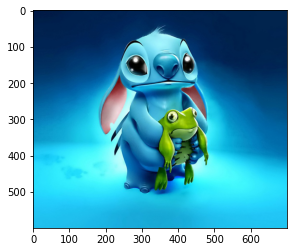

In [ ]:
print('Data shape:', data.shape)
print('Data type:', type(data))
plt.imshow(data)
plt.show()

Бинарная картинка, которую будем скрывать от посторонних глаз:

Data shape: (600, 700, 3)
Data type: <class 'numpy.ndarray'>


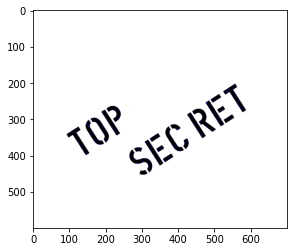

In [ ]:
print('Data shape:', data_secret.shape)
print('Data type:', type(data_secret))
plt.imshow(data_secret)
plt.show()

Перекодируем в массив `data_secret_binary` из восьмибитного (0 или 255) в бинарный (0 или 1) вид картинку выше

In [ ]:
data_secret_binary = vec_func_make_pixel_binary_from_8bit(data_secret) 

Определим в переменную `bitmap_number_2_method_1_bitmap` битовую плоскость, в которую будем внедрять информацию

In [ ]:
bitmap_number_2_method_1_bitmap = 1 # номер битовой плоскости в данном эксперименте

В `data_with_with_encoded_secret_2_method_1_bitmap` получим картинку с скрытыми данными внутри.

Ниже можно наблюдать эту картинку.

Data shape: (600, 700, 3)
Data type: <class 'numpy.ndarray'>


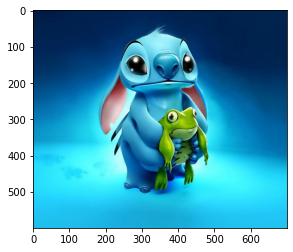

In [ ]:


data_with_with_encoded_secret_2_method_1_bitmap = vec_func_encode_pix_with_logical_and_2_method(data, data_secret_binary, bitmap_number_2_method_1_bitmap) 
print('Data shape:', data_with_with_encoded_secret_2_method_1_bitmap.shape)
print('Data type:', type(data_with_with_encoded_secret_2_method_1_bitmap))
plt.imshow(data_with_with_encoded_secret_2_method_1_bitmap)
plt.show()

Раскодируем информацию из картинки выше:

max = 1
max = 255
Data shape: (600, 700, 3)
Data type: <class 'numpy.ndarray'>


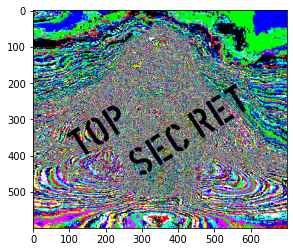

In [ ]:
decoded_secret_data_2_method_1_bitmap = vec_func_decode_pix_with_logical_and_2_method(data_with_with_encoded_secret_2_method_1_bitmap, data, bitmap_number_2_method_1_bitmap) 
print("max =", np.max(decoded_secret_data_2_method_1_bitmap))
# мы получили бинарное изображение и np.max(decoded_secret_data_2_method)=1, преобразуем ранее написанной функцией в восьмибитную
decoded_secret_data_2_method_1_bitmap = vec_func_make_pixel_8bit_from_binary(decoded_secret_data_2_method_1_bitmap)
print("max =", np.max(decoded_secret_data_2_method_1_bitmap))
print('Data shape:', decoded_secret_data_2_method_1_bitmap.shape)
print('Data type:', type(decoded_secret_data_2_method_1_bitmap))
plt.imshow(decoded_secret_data_2_method_1_bitmap)
plt.show()

Интересно отметить, что в результате всех преобразований потерялась информация, что в принципе действительно так:

Если взять $W=0,C_{p}=1$, то $C_{p}^{W}=1$

$C_{p}^{W}$ будет так же равно единице, если взять $W=1,C_{p}=1$

Поэтому у нас получился столь "странный" закондированный рисунок

### Получим те же рисунки, но для другой битовой плоскости по варианту:

Определим в переменную `bitmap_number_2_method_2_bitmap` битовую плоскость, в которую будем внедрять информацию

In [ ]:
bitmap_number_2_method_2_bitmap = 2 # номер битовой плоскости в данном эксперименте

В `data_with_with_encoded_secret_2_method_2_bitmap` получим картинку с скрытыми данными внутри.

Ниже можно наблюдать эту картинку.

Data shape: (600, 700, 3)
Data type: <class 'numpy.ndarray'>


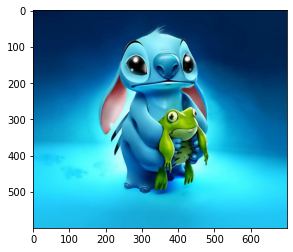

In [ ]:
data_with_with_encoded_secret_2_method_2_bitmap = vec_func_encode_pix_with_logical_and_2_method(data, data_secret_binary, bitmap_number_2_method_2_bitmap) 
print('Data shape:', data_with_with_encoded_secret_2_method_1_bitmap.shape)
print('Data type:', type(data_with_with_encoded_secret_2_method_2_bitmap))
plt.imshow(data_with_with_encoded_secret_2_method_2_bitmap)
plt.show()

Раскодируем информацию из картинки выше:

max = 1
max = 255
Data shape: (600, 700, 3)
Data type: <class 'numpy.ndarray'>


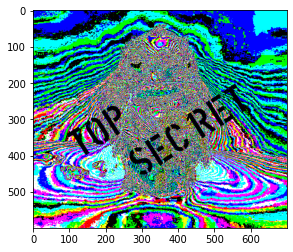

In [ ]:
decoded_secret_data_2_method_2_bitmap = vec_func_decode_pix_with_logical_and_2_method(data_with_with_encoded_secret_2_method_2_bitmap, data, bitmap_number_2_method_2_bitmap) 
print("max =", np.max(decoded_secret_data_2_method_2_bitmap))
# мы получили бинарное изображение и np.max(decoded_secret_data_2_method)=1, преобразуем ранее написанной функцией в восьмибитную
decoded_secret_data_2_method_2_bitmap = vec_func_make_pixel_8bit_from_binary(decoded_secret_data_2_method_2_bitmap)
print("max =", np.max(decoded_secret_data_2_method_2_bitmap))
print('Data shape:', decoded_secret_data_2_method_2_bitmap.shape)
print('Data type:', type(decoded_secret_data_2_method_2_bitmap))
plt.imshow(decoded_secret_data_2_method_2_bitmap)
plt.show()

Можно отметить, что раскодированные картинки для плоскостей `bitmap_number = 1`  и `2` отличаются и при `bitmap_number = 2` даже просматривается образа из исходного контейнера со Стичем.

# Реализуем по заданию для моего 7 варианта 3 и 4 задание.

## Simple-QIM встраивание - Упрощенная система встраивания ЦВЗ за счёт управляемого переквантования.

$ C_{p}^{W}(n_{1},n_{2}) = [\frac{C(n_{1},n_{2})}{2δ}] ⋅ 2δ + W(n_{1},n_{2}) ⋅ δ + ν$



Где $δ$  - параметр алгоритма

$ν$ - параметр алгоритма (или 0 или белый шум в диапазоне $[0,δ-1]$)

$W$ - значение интенсивности встраемого пикселя,

$C_{p}^{W}$ - итоговое значение интенсивности пикселя со встроенными данными,

$C(n_{1},n_{2})$ - исходное значение интенсивности пикселя до встраивания данных,

$(n_{1},n_{2})$ - два индекса пикселя на картинке

В моем варианте $ν = 0, δ = 5$ 

Для моего варианта формула сведется к:

$ C_{p}^{W}(n_{1},n_{2}) = [\frac{C(n_{1},n_{2})}{10}] ⋅ 10 + 5 ⋅ W(n_{1},n_{2})$


In [ ]:
def encode_simple_qim(pix: int, pix_secret: int, delta: int, nu: int):
  """
  Данный метод реализовывает встраивание информации методом simple-qim
  Keyword arguments:
    pix -- Пиксель изображения, в который встраивем код в НЗБ. Подразумевается, что переменная pix целочисленная и лежит в диапазоне [0, 255].
    pix_secret -- Пиксель изображения, который будем встраивать. Он должен быть целочисленным и лежать в диапазоне [0, 1].
    delta -- параметр алгоритма
    nu -- параметр алгоритма (или 0 или белый шум в диапазоне $[0,δ-1]$)
  """
  assert str(pix).isdigit(), "в pix может хранится только целое число"
  assert str(pix_secret).isdigit(), "в pix_secret может хранится только целое число"
  assert str(delta).isdigit(), "в delta может хранится только целое число"
  assert str(nu).isdigit(), "в nu может хранится только целое число"
  
  pix = int(pix)
  pix_secret = int(pix_secret)
  delta = int(delta)
  nu = int(nu)

  assert (pix_secret == 0) | (pix_secret == 1), "в pix_secret может хранится только целое число 0 или 1"
  assert (pix >=0) & (pix <= 255), "в pix может хранится только целое число в диапазоне [0, 255]"
  assert (nu >=0) & (nu < delta), "в nu может хранится только целое число в диапазоне [0, delta-1]"
  
  return int(pix / 2 / delta) * 2 * delta + delta * pix_secret + nu

encode_simple_qim(250, 1, 5, 0)

255

С помощью np.vectorize определяем особую функцию, которая к каждому элементу массива нашей картинки применяет функцию encode_simple_qim

In [ ]:
vec_func_encode_simple_qim = np.vectorize(encode_simple_qim)

Получим картинку, в которую закодирована информация:

max = 255
Data shape: (600, 700, 3)
Data type: <class 'numpy.ndarray'>


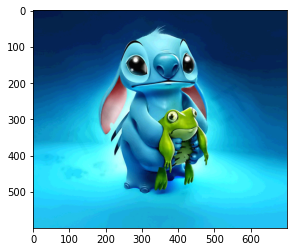

In [ ]:
data_with_encoded_simple_qim = vec_func_encode_simple_qim(data, data_secret_binary, 5, 0) 
print("max =", np.max(data_with_encoded_simple_qim))
print('Data shape:', data_with_encoded_simple_qim.shape)
print('Data type:', type(data_with_encoded_simple_qim))
plt.imshow(data_with_encoded_simple_qim)
plt.show()

### Далее декодируем информацию из картинки обратно:

Соответственно обратная формула, которую просят вывести самостоятельно равна:

$ W(n_{1},n_{2}) = (C(n_{1},n_{2}) \% 2δ) / δ $

Для моего варианта формула сведется к:

$ W(n_{1},n_{2}) = (C(n_{1},n_{2}) \% 10) / 5 $


In [ ]:
def decode_simple_qim(encode_pix: int, delta: int):
  """
  Данный метод реализовывает декодирование информации после метода simple-qim
  Keyword arguments:
    encode_pix -- Пиксель закодированного изображения, в который встроены данные. Подразумевается, что переменная encode_pix целочисленная и лежит в диапазоне [0, 255].
    delta -- параметр алгоритма
  """
  assert str(encode_pix).isdigit(), "в encode_pix может хранится только целое число"
  assert str(delta).isdigit(), "в delta может хранится только целое число"
  
  pix = int(encode_pix)
  delta = int(delta)

  assert (encode_pix >=0) & (encode_pix <= 255), "в encode_pix может хранится только целое число в диапазоне [0, 255]"
  
  return int((encode_pix % (2 *delta)) / delta)

decode_simple_qim(15, 5)


1

С помощью np.vectorize определяем особую функцию, которая к каждому элементу массива нашей картинки применяет функцию decode_simple_qim

In [ ]:
vec_func_decode_simple_qim = np.vectorize(decode_simple_qim)

max = 1
max = 255
Data shape: (600, 700, 3)
Data type: <class 'numpy.ndarray'>


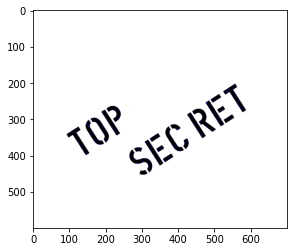

In [ ]:
decoded_secret_data_simple_qim = vec_func_decode_simple_qim(data_with_encoded_simple_qim, 5) 
print("max =", np.max(decoded_secret_data_simple_qim))
# мы получили бинарное изображение и np.max(decoded_secret_data_simple_qim)=1, преобразуем ранее написанной функцией в восьмибитную
decoded_secret_data_simple_qim = vec_func_make_pixel_8bit_from_binary(decoded_secret_data_simple_qim)
print("max =", np.max(decoded_secret_data_simple_qim))
print('Data shape:', decoded_secret_data_simple_qim.shape)
print('Data type:', type(decoded_secret_data_simple_qim))
plt.imshow(decoded_secret_data_simple_qim)
plt.show()

Оура, мы получили декодированную картинку! Задание 3 и 4 выполнено